## Описание проекта

**Описание**
Инвистиционная компания купила крупный сервис для чтения книг по подписке. 

**Заказчик:**
Менеджер проекта.

**Стейкхолдеры:**
Менеджер проекта, руководство компании.

**Задача:**
- проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. 


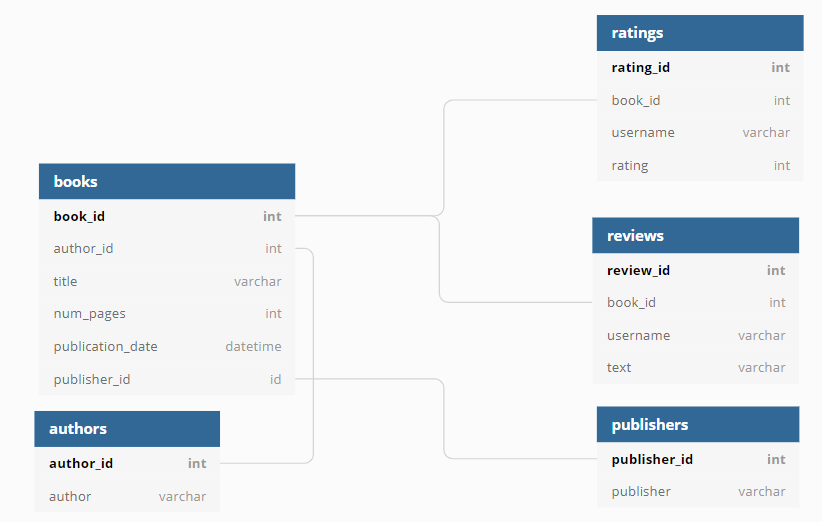

## Исследование таблиц

In [1]:
# импортируем библиотеки
import pandas as pd 
from sqlalchemy import create_engine 
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', 
            'port': 6432, # порт подключения
            'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], 
                                                         db_config['pwd'], 
                                                         db_config['host'], 
                                                         db_config['port'], 
                                                         db_config['db']) 
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

**Выгрузим и проверим таблицу `books`**

In [2]:
query = '''
-- посчитаем количество строк в таблице с книгами
SELECT COUNT(*)
FROM books
'''
pd.io.sql.read_sql(query, con = engine)

,count
0,1000


In [3]:
query = '''
-- посмотрим наполнение таблиц
SELECT *
FROM books
LIMIT 5
'''
pd.io.sql.read_sql(query, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
query = '''
-- проверим даты публикаций
SELECT 
      MAX(CAST (publication_date AS DATE)),
      MIN(CAST (publication_date AS DATE)),
      COUNT(DISTINCT(publisher_id ))
FROM books
'''
pd.io.sql.read_sql(query, con = engine)

,max,min,count
0,2020-03-31,1952-12-01,340


In [5]:
query = '''
-- посмотрим наполнение таблиц
SELECT *
FROM books
'''
a = pd.io.sql.read_sql(query, con = engine)
# проверим наличие пропусков и типы данных
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


**Таблица books - содержит данные о 1000 книгах:**

	* book_id — идентификатор книги (первичный ключ);
	* author_id — идентификатор автора (внешний ключ);
	* title — название книги;
	* num_pages — количество страниц;
	* publication_date — дата публикации книги;
	* publisher_id — идентификатор издателя (внешний ключ).

**Выгрузим и проверим таблицу `authors`**

In [6]:
query = '''
-- посчитаем количество строк в таблице с авторами
SELECT COUNT(*)
FROM authors
'''
pd.io.sql.read_sql(query, con = engine)

,count
0,636


In [7]:
query = '''
-- посмоторим наполнение таблицы
SELECT *
FROM authors
LIMIT 5
'''
pd.io.sql.read_sql(query, con = engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [8]:
query = '''
-- посмоторим наполнение таблицы
SELECT *
FROM authors
'''
a = pd.io.sql.read_sql(query, con = engine)
# проверим наличие пропусков и типы данных
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


**Таблица authors - содержит данные о 636 авторах:**

	* author_id — идентификатор автора (первичный ключ);
	* author — имя автора.

**Выгрузим и проверим таблицу `publishers`**

In [9]:
query = '''
-- посчитаем количество строк в таблице с авторами
SELECT COUNT(*)
FROM publishers
'''
pd.io.sql.read_sql(query, con = engine)

,count
0,340


In [10]:
query = '''
-- посмотрим наполнение таблицы
SELECT *
FROM publishers
LIMIT 5
'''
pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [11]:
query = '''
-- посмотрим наполнение таблицы
SELECT *
FROM publishers
'''
p = pd.io.sql.read_sql(query, con = engine)
# проверим наличие пропусков и типы данных
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


**Таблица publishers - содержит данные о 340 издательствах:**

	* publisher_id — идентификатор издательства (первичный ключ);
    * publishers - название издательства.

**Выгрузим и проверим таблицу `ratings`**

In [12]:
query = '''
-- посчитаем количество строк в таблице с рейтингами
SELECT COUNT(*)
FROM ratings
'''
pd.io.sql.read_sql(query, con = engine)

,count
0,6456


In [13]:
query = '''
-- посмотрим наполнение таблицы
SELECT *
FROM ratings
LIMIT 5
'''
pd.io.sql.read_sql(query, con = engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [14]:
query = '''
-- вычислим количество пользователей
SELECT 
    COUNT(DISTINCT(username))
FROM ratings
'''
pd.io.sql.read_sql(query, con = engine)

,count
0,160


In [15]:
query = '''
-- посмотрим наполнение таблицы
SELECT *
FROM ratings
'''
r = pd.io.sql.read_sql(query, con = engine)
# проверим наличие пропусков и типы данных
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


**Таблица ratings - содержит данные о пользовательских оценках книг (6456 оценок):**

	* rating_id — идентификатор оценки (внутренний ключ);
	* book_id — идентификатор книги (внешний ключ);
	* username — имя пользователя, оставившего оценку;
	* rating — оценка книги.

**Выгрузим и проверим таблицу `ratings`**

In [16]:
query = '''
-- посчитаем количество строк в таблице с авторами
SELECT COUNT(*)
FROM reviews
'''
pd.io.sql.read_sql(query, con = engine)

,count
0,2793


In [17]:
query = '''
-- посмотрим наполнение таблицы
SELECT *
FROM reviews
LIMIT 5
'''
pd.io.sql.read_sql(query, con = engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [18]:
query = '''
-- вычислим количество пользователей
SELECT 
    COUNT(DISTINCT(username))
FROM reviews
'''
pd.io.sql.read_sql(query, con = engine)

,count
0,160


In [19]:
query = '''
-- посмотрим наполнение таблицы
SELECT *
FROM reviews
'''
rev = pd.io.sql.read_sql(query, con = engine)
# проверим наличие пропусков и типы данных
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


**Таблица reviews - содержит данные о пользовательских обзорах на книги:**

	* review_id — идентификатор обзора (первичный ключ);
	* book_id — идентификатор книги (внешний ключ);
	* username — имя пользователя, написавшего обзор;
	* text — текст обзора.

## Задания

###  Посчитайте, сколько книг вышло после 1 января 2000 года

In [20]:
query = '''
SELECT COUNT(book_id)
FROM books
WHERE publication_date > '2000-01-01'
'''
print('Количество книг опубликованных после 1 января 2000 года:')
pd.io.sql.read_sql(query, con = engine)

Количество книг опубликованных после 1 января 2000 года:


,count
0,819


### 	Для каждой книги посчитайте количество обзоров и среднюю оценку

In [21]:
query = '''
SELECT b.book_id,
        b.title,
        COUNT(DISTINCT(rev.review_id)) AS count_review,
        ROUND(AVG(rat.rating),1) AS avg_rating
FROM books AS b
LEFT JOIN ratings AS rat ON  b.book_id  = rat.book_id
LEFT JOIN reviews AS rev ON  b.book_id  = rev.book_id
GROUP BY b.book_id
ORDER BY count_review DESC
'''
print('Количество обзоров и средняя оценка каждой книги:')
pd.io.sql.read_sql(query, con = engine)

Количество обзоров и средняя оценка каждой книги:


,book_id,title,count_review,avg_rating
0,948,Twilight (Twilight #1),7,3.7
1,963,Water for Elephants,6,4.0
2,734,The Glass Castle,6,4.2
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.4
4,695,The Curious Incident of the Dog in the Night-Time,6,4.1
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.7
996,808,The Natural Way to Draw,0,3.0
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.0
998,221,Essential Tales and Poems,0,4.0


Количество обзоров и средняя оценка каждой книги представлены в таблице.

### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [22]:
query = '''
WITH   --создадим временную таблицу
b AS (SELECT book_id,
        publisher_id 
        FROM books
        WHERE num_pages > 50)
SELECT p.publisher,
        COUNT(b.book_id) AS count_book
FROM publishers AS p
LEFT JOIN b ON b.publisher_id = p.publisher_id
GROUP BY p.publisher
ORDER BY count_book DESC
LIMIT 1
'''
print('Издательство, которое выпустило наибольшее число книг толще 50 страниц:')
pd.io.sql.read_sql(query, con = engine)

Издательство, которое выпустило наибольшее число книг толще 50 страниц:


,publisher,count_book
0,Penguin Books,42


Penguin Books - является издательством, которое выпустило наибольшее число книг толще 50 страниц.

### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [23]:
query = '''
--
SELECT 
       aut.author,
       COUNT (rat.rating_id) AS count_rating,
       ROUND (AVG(rat.rating),2) AS avg_rating
FROM books AS b 
--по ID книги присоединим таблицы с книгами и рейтингом
LEFT JOIN ratings AS rat ON b.book_id = rat.book_id   
--по ID книги присоединим таблицы с книгами и авторами
LEFT JOIN authors AS aut ON b.author_id = aut.author_id
GROUP BY aut.author --группировка по автору книги
--выделим книги с 50 и более оценками
HAVING COUNT (rat.rating_id) >= 50
ORDER BY count_rating DESC
LIMIT 1
'''       
pd.io.sql.read_sql(query, con = engine)

,author,count_rating,avg_rating
0,J.K. Rowling/Mary GrandPré,312,4.29


Автором с самой высокой средней оценкой книг (брали книги с 50 и более оценками) является J.K. Rowling/Mary GrandPré. Средняя оценка составляет 4,29

### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [24]:
query = '''
WITH
-- найдем пользователей, которые поставили больше 50 оценок
rat AS (SELECT 
       username,
       COUNT (rating_id) AS count_rating
FROM ratings 
GROUP BY username
HAVING COUNT (rating_id) > 50
ORDER BY count_rating DESC
),
-- посчитаем количество обзоров выделенных пользователей
rev AS (SELECT 
        rat.username,
        COUNT (rev.review_id) AS count_rev
FROM reviews AS rev 
JOIN rat ON rat.username = rev.username
GROUP BY rat.username)
-- посчитаем среднее количество обзоров 
SELECT
    ROUND (AVG (rev.count_rev))
FROM rev
'''    
pd.io.sql.read_sql(query, con = engine)

,round
0,24.0


Среднее количество обзоров от пользователей, которые поставили больше 50 оценок = 24

**В данном проекте была проанализирована база данных крупного сервиса для чтения книг по подписке.**

- В базе сервиса находиться информация о 1000 книгах с датой публикации с 1952 по 2020 годы.
- Книги были изданы 340 издателями. Также имеется информация о более чем 600 авторах книг. 
- Количество уникальных активных пользователей (оставляли оценки или обзор) записанных в базе равно 160.
- После 1 января 2000 года вышло 819 книг.
- Для каждой книги было посчитано количество обзоров и средняя оценка. Создана отдельная таблица (каталог). Максимальное количество обзоров, написанных на одну книгу равно 7. Также имеются книги без обзоров.  Необходимо стимулировать пользователей оставлять обзоры, общаться в книжных клубах, построить бонусную систему. 
- Автором с самой высокой средней оценкой книг (брали книги с 50 и более оценками) является J.K. Rowling/Mary GrandPré. Средняя оценка составляет 4,29. Необходимо поднять такие книги в каталоге страницы - выводить ТОП-10 книг, показывать лучшие обзоры и стимулировать интерес других читателей к прочтению. 
- Среднее количество обзоров от пользователей, которые поставили больше 50 оценок = 24. Необходимо стимулировать оставлять обзоры пользователями, выделить лучших (эксперт-читатель 1-го уровня, критик 1-го уровня, 2-го уровня и т.д.), создать форумы для общения, начислять бонусные баллы за оставление обзоров, оценок и т.д.

**Поработав с приложением и внедрив новые фичи, можно оторваться от конкурентов рынка и занять целевую нишу на рынке.**